# **Bivariant Analysis - Correlation heatmap and pair scatter plot**

**Correlation heatmap**

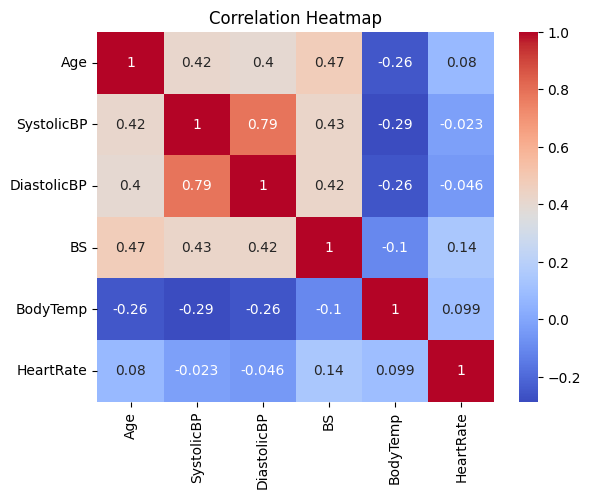

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as split
import os


df = pd.read_csv('MHR.csv')
df.head(5)

# Exclude the 'RiskLevel' column from the correlation matrix
numerical_df = df.drop(columns=['RiskLevel'])

sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


p_colors = ['forestgreen', 'gold', 'red']
risk_order = ["low risk", "mid risk", "high risk"]



Observation :

The variables SystolicBP and DiastolicBP show a strong positive correlation (0.79), indicating they, share highly similar information. This phenomenon, known as multicollinearity, can impact the statistical significance of independent variables in a model. It's essential to consider removing one of these variables to avoid redundancy during model training. However, before making this decision, further investigation is needed to determine which variable can be safely eliminated without losing critical information. This step ensures the model remains both accurate and interpretable.

**Pair-wise scatter plot**

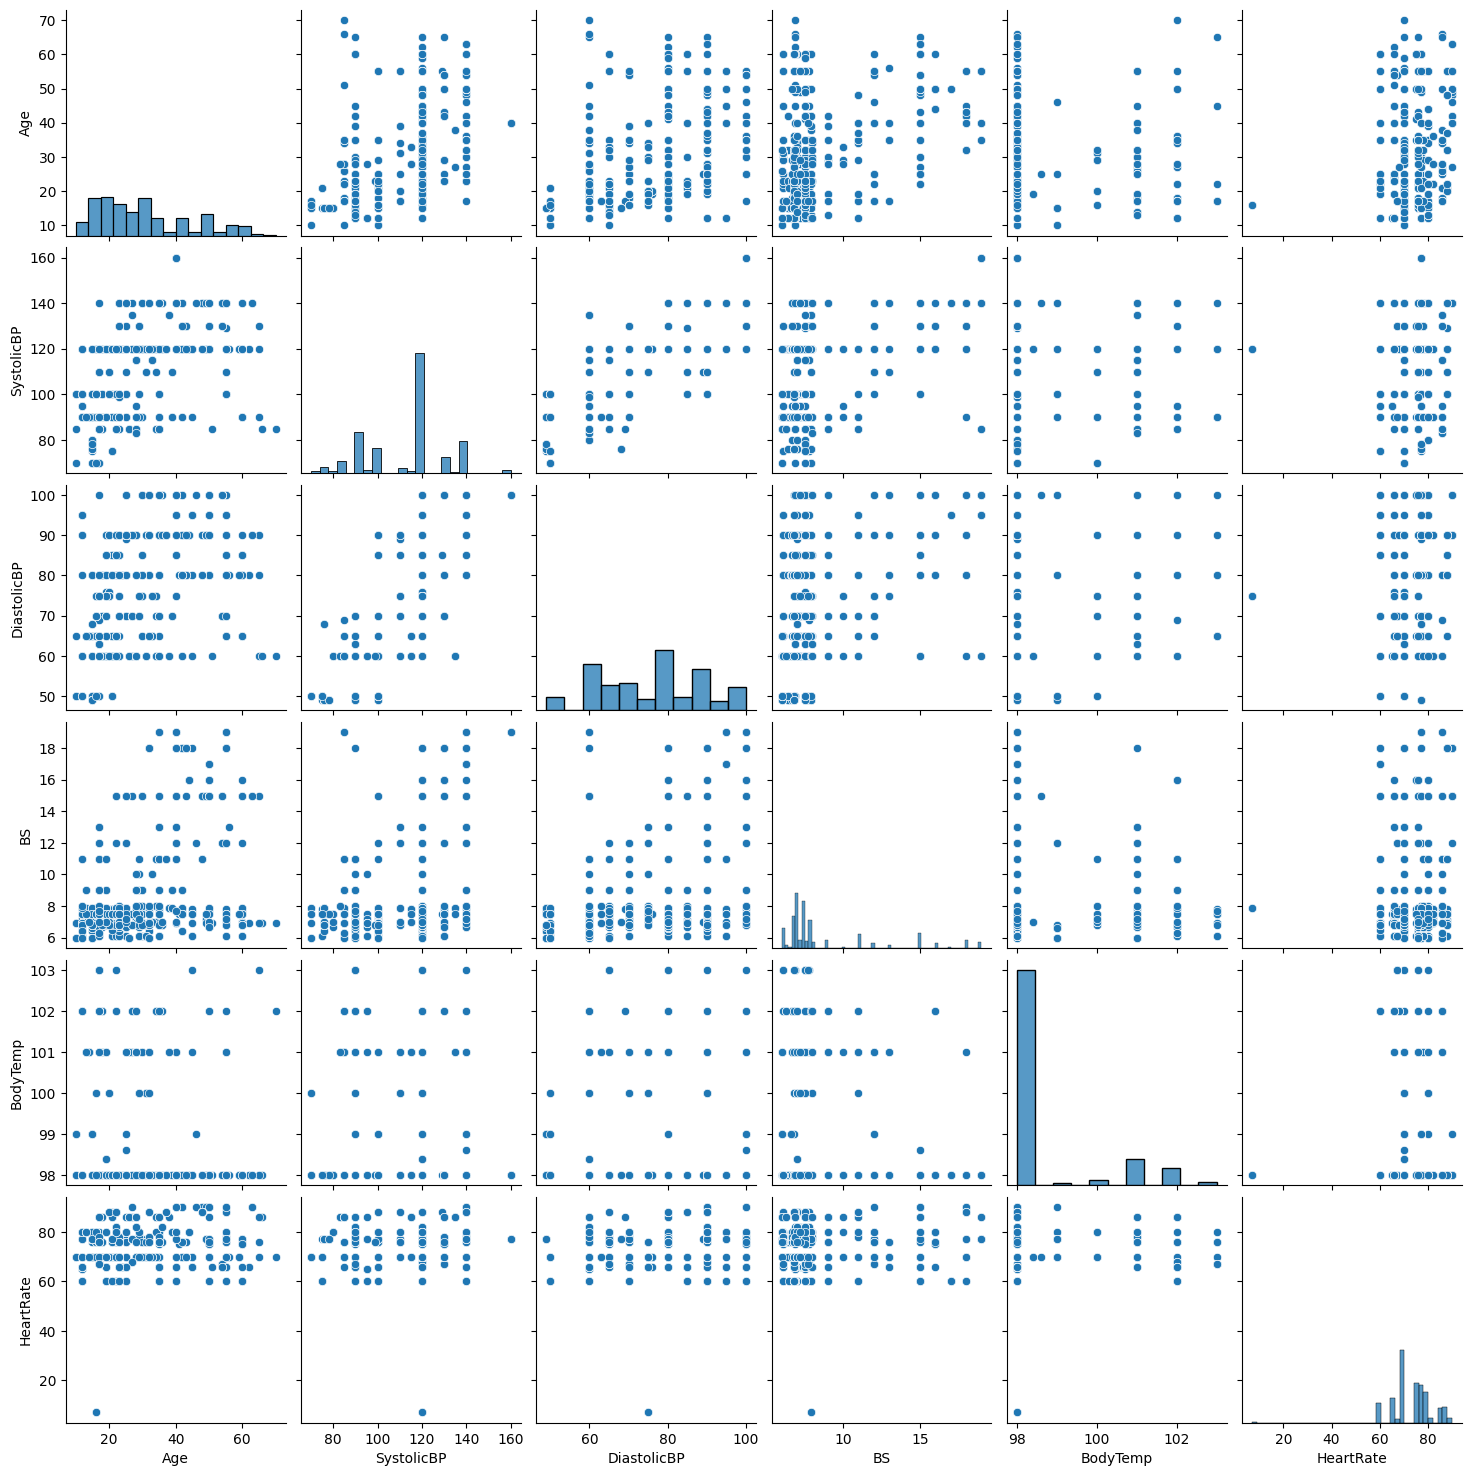

In [7]:
sns.pairplot(df)
plt.show()

Observation:

In the pair-wise scatter plot, only the SystolicBP and DiastolicBP graph shows a nearly diagonal distribution, indicating a strong linear relationship between these variables. Other scatter graphs appear vertically or horizontally spread, suggesting no significant linear correlation. This observation implies that systolicBP and diastolicBP may be related linearly, while the other variables exhibit independence or non-linear relationships. Further analysis could explore the nature of these relationships and their impact on the dataset's overall patterns and correlations.

# Try some models

**Linear Regression**

Accuracy: 0.65
Confusion Matrix:
[[40  2  5]
 [ 4 70  6]
 [13 42 21]]
Classification Report:
              precision    recall  f1-score   support

   high risk       0.70      0.85      0.77        47
    low risk       0.61      0.88      0.72        80
    mid risk       0.66      0.28      0.39        76

    accuracy                           0.65       203
   macro avg       0.66      0.67      0.63       203
weighted avg       0.65      0.65      0.61       203



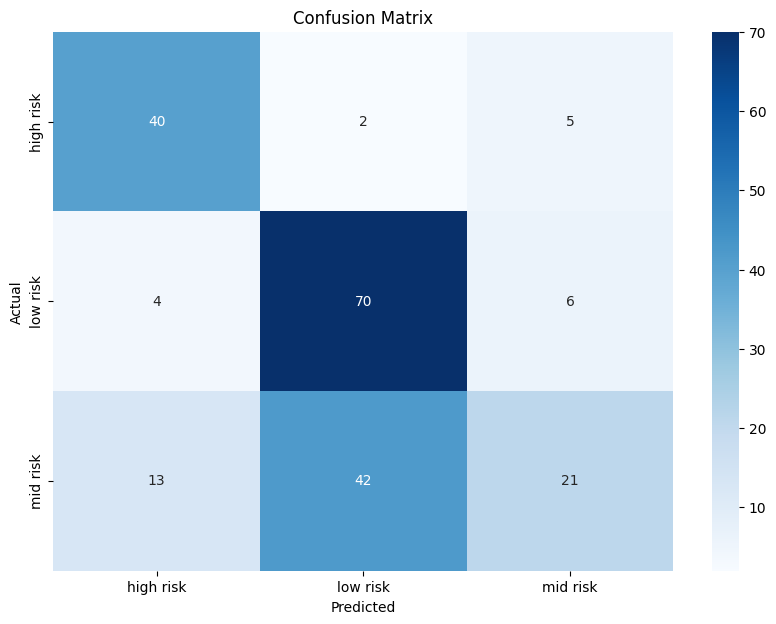

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('MHR.csv')

# Encode the 'RiskLevel' column
label_encoder = LabelEncoder()
df['RiskLevel'] = label_encoder.fit_transform(df['RiskLevel'])

# Separate features and target variable
X = df.drop(columns=['RiskLevel'])
y = df['RiskLevel']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Train the model
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


SVM

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

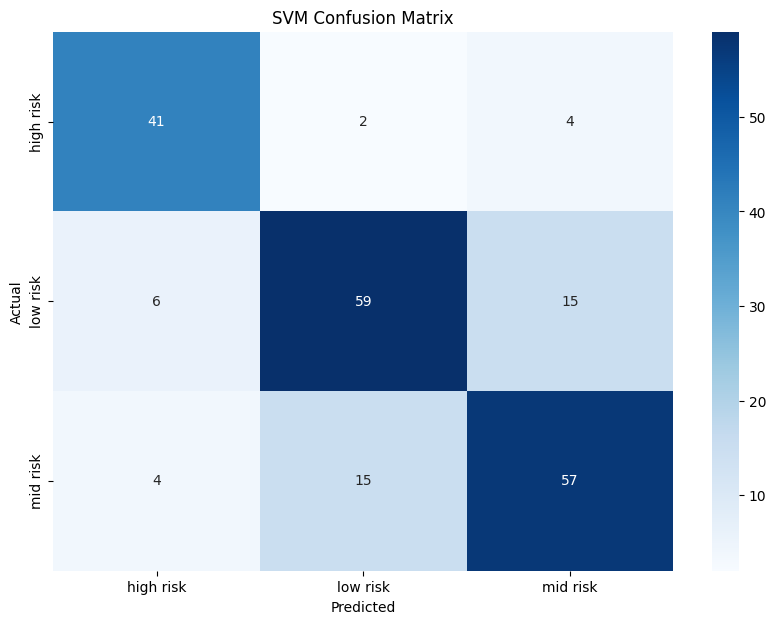

In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('MHR.csv')

# Encode the 'RiskLevel' column
label_encoder = LabelEncoder()
df['RiskLevel'] = label_encoder.fit_transform(df['RiskLevel'])

# Separate features and target variable
X = df.drop(columns=['RiskLevel'])
y = df['RiskLevel']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the SVM model with hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)

# Make predictions
y_pred_svm = grid.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_)

print(f"Best Parameters: {grid.best_params_}")
print(f"SVM Accuracy: {accuracy_svm:.2f}")
print("SVM Confusion Matrix:")
print(conf_matrix_svm)
print("SVM Classification Report:")
print(class_report_svm)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()


More tuning in SVM takes too much time


Stacking classifier - an ensemble learning method that combines multiple classification models to produce a final prediction.

Stacking Classifier Accuracy: 0.83
Stacking Classifier Confusion Matrix:
[[40  2  5]
 [ 3 64 13]
 [ 3  9 64]]
Stacking Classifier Classification Report:
              precision    recall  f1-score   support

   high risk       0.87      0.85      0.86        47
    low risk       0.85      0.80      0.83        80
    mid risk       0.78      0.84      0.81        76

    accuracy                           0.83       203
   macro avg       0.83      0.83      0.83       203
weighted avg       0.83      0.83      0.83       203



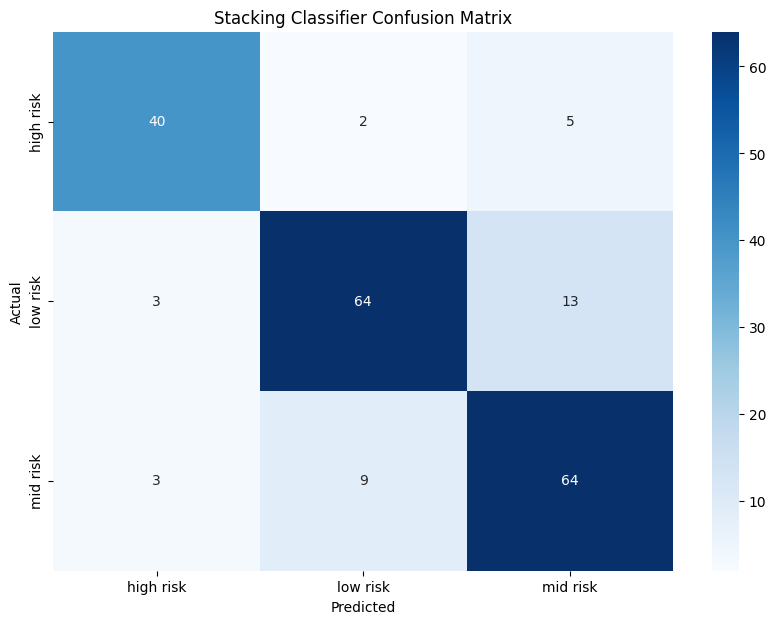

In [5]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# Define the base models
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5))
]

# Initialize the Stacking model
stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()
)

# Train the model
stacking_model.fit(X_train, y_train)

# Make predictions
y_pred_stack = stacking_model.predict(X_test)

# Evaluate the model
accuracy_stack = accuracy_score(y_test, y_pred_stack)
conf_matrix_stack = confusion_matrix(y_test, y_pred_stack)
class_report_stack = classification_report(y_test, y_pred_stack, target_names=label_encoder.classes_)

print(f"Stacking Classifier Accuracy: {accuracy_stack:.2f}")
print("Stacking Classifier Confusion Matrix:")
print(conf_matrix_stack)
print("Stacking Classifier Classification Report:")
print(class_report_stack)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_stack, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Stacking Classifier Confusion Matrix')
plt.show()
